# Comparing Higher Order Modes 
In this notebook, I will be comparing different higher order modes for the surrogate model, NRSur7dq4. 
NRSur7dq4 = Numerical Relativity Surrogate with 7 Dimensions up to mass ratio (q) of 4.
A tutorial of this surrogate model can be found at: https://zenodo.org/record/3348115#.XvzoAS2ZOQW

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gwsurrogate

/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
sur = gwsurrogate.LoadSurrogate('NRSur7dq4')

/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:245: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.t = h5file['t_ds'].value
/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:272: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_coefs'%(key)].value,
/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:273: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'bfOrders': group['%s_bfOrders'%(key)].value
/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogate/new/precessing_surrogate.py:282: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'coefs': group['%s_%d_coefs'%(key, i)].value,
/Users/jennifersanchez/anaconda3/lib/python3.7/site-packages/gwsurrogat

Loaded NRSur7dq4 model


## Evaluate waveform modes in physical units

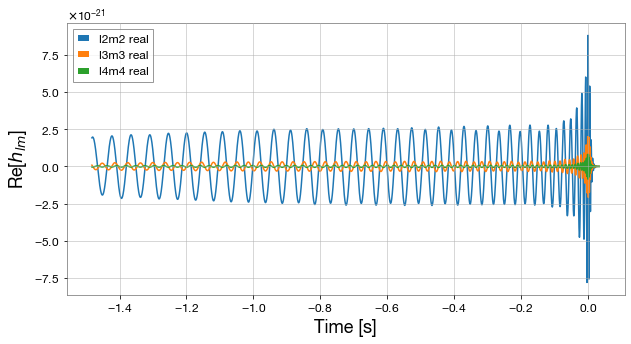

In [44]:
q = 4
chiA = [-0.2, 0.4, 0.1]
chiB = [-0.5, 0.2, -0.4]
f_ref = 20         # Reference frequecny in Hz. The spins are assumed to specified at this frequency
f_low = 0          # initial frequency, f_low=0 returns the full surrogate
M = 70             # Total masss in solar masses
dist_mpc = 100     # distance in megaparsecs
dt = 1./4096       # step size in seconds
ellMax = 4         # Highest ell index for modes to use

# dyn stands for dynamics, do dyn.keys() to see contents
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low, f_ref=f_ref, ellMax=ellMax, M=M, dist_mpc=dist_mpc, units='mks')

plt.plot(t, h[(2,2)].real, label='l2m2 real')
plt.plot(t, h[(3,3)].real, label='l3m3 real')
plt.plot(t, h[(4,4)].real, label='l4m4 real')
plt.ylabel('Re[$h_{lm}$]', fontsize=18)
plt.xlabel('Time [s]', fontsize=18)
plt.rcParams["figure.figsize"] = [10,5]
plt.legend()

### *Note:*
As we increase the mode, the amplitude of the strain decreases. Let's see if we obtain the same result in the frequency domain.

In [4]:
#more imports
#import gwpy
from gwpy.timeseries import TimeSeries
from scipy.signal import get_window

### *Note:*
GWpy is heavily object-oriented, meaning almost all of the code you run using GWpy is based around an object of some type, e.g. TimeSeries. Most of the methods (functions) we will use are attached to an object, rather than standing alone, meaning you should have a pretty good idea of what sort of data you are dealing with (without having to read the documentation!).

In [5]:
#for reference,
#use: https://github.com/gw-odw/odw-2020/blob/master/Day_1/Tuto%201.2%20Open%20Data%20access%20with%20GWpy.ipynb


#Time series 
strain22 = h[(2,2)].real
strain33 = h[(3,3)].real
strain44 = h[(4,4)].real
model_waveform_series22 = TimeSeries(strain22, unit = '', sample_rate = 4096, name = 'strain22')
model_waveform_series33 = TimeSeries(strain33, unit = '', sample_rate = 4096, name = 'strain33')
model_waveform_series44 = TimeSeries(strain44, unit = '', sample_rate = 4096, name = 'strain44')
#print(model_waveform_series)


## Apply a window function to our time-domain data before transforming
We need to apply a window function to our time-domain data because this will *smoothly* zero out the data we aren't analyzing. We use the Tukey window to minimize the distortion to the signal. Mostly using the Tukey window because it's the simplest. 

In [16]:
#help(get_window)
window22 = get_window(('tukey', (0.1)), model_waveform_series22.size)
window33 = get_window(('tukey', (0.1)), model_waveform_series33.size)
window44 = get_window(('tukey', (0.1)), model_waveform_series44.size)
series_with_window22 = model_waveform_series22 * window22
series_with_window33 = model_waveform_series33 * window33
series_with_window44 = model_waveform_series44 * window44

## Calculating/plotting the Fourier transform of our TimeSeries

In [18]:
#calculate/plotting the Fourier transform of our TimeSeries
fft_amplitude22 = series_with_window22.fft().abs()
fft_amplitude33 = series_with_window33.fft().abs()
fft_amplitude44 = series_with_window44.fft().abs()

print(fft_amplitude22.plot)

<bound method FrequencySeries.plot of <FrequencySeries([1.70452272e-27, 5.25298483e-25, 2.65590559e-24,
                  ..., 3.51946780e-29, 3.59345251e-29,
                  3.66270323e-29]
                 unit=Unit(dimensionless),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.65915674 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=0.0>,
                 name='strain22',
                 channel=None)>>


The result is a FrequencySeries, with real amplitudes.

## Comparing the higher order modes

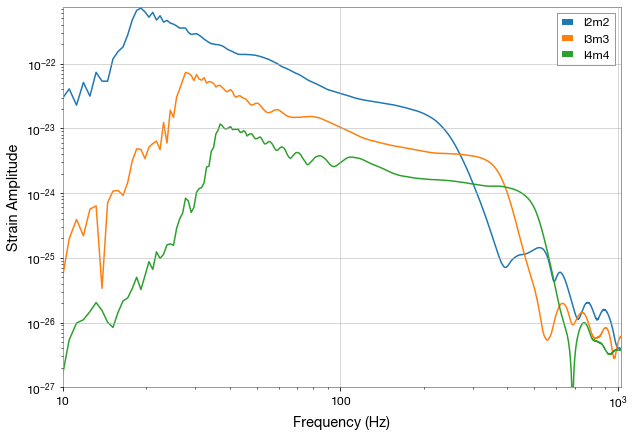

In [32]:
plt.plot(fft_amplitude22.frequencies.value, fft_amplitude22.value,label='l2m2')
plt.plot(fft_amplitude33.frequencies.value, fft_amplitude33.value, label='l3m3')
plt.plot(fft_amplitude44.frequencies.value, fft_amplitude44.value, label='l4m4')
plt.ylabel('Strain Amplitude')
plt.xlabel('Frequency (Hz)')
plt.xlim([10,1024])
plt.ylim(10E-28)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.rcParams["figure.figsize"] = [5,5]
plt.show()

### *Discussion:*
The flattening before the "knee" is the merger and "knee" is the ringdown. The "knee" is a damped sinusiodal. The wiggling at lower frequencies could be numerical noise or spin orbital precession. The results are as expected, as the mode increases, the amplitude of the strain decreases.